In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 15.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
#%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
import tensorflow as tf
print("tensorflow version :{}".format(tf.__version__))
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tensorflow version :2.9.2
Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3722547535937165625
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14415560704
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13770333906835770107
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import class_weight

In [ ]:
from keras.layers import Conv1D, Dense, Dropout, GlobalMaxPool1D
from keras.layers import TimeDistributed, LSTM, Bidirectional
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import plot_model, to_categorical
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
data_path = '/content/drive/MyDrive/CAV/data/Constant attack/0_1_dur_10/'

In [ ]:
sensor1_data = pd.read_csv(data_path + "Sensor1_values_constant_0_1.csv", index_col= 'Unnamed: 0')
sensor1_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor1_label = pd.read_csv(data_path+"Ground_truth_constant_0_1_dur_10_sensor1.csv", names=['Class'])
sensor1_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor2_data = pd.read_csv(data_path + "Sensor2_values_constant_0_1.csv", index_col = "Unnamed: 0")
sensor2_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor2_label = pd.read_csv(data_path + "Ground_truth_constant_0_1_dur_10_sensor2.csv",names=['Class'])
sensor2_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor3_data = pd.read_csv(data_path + "Sensor3_values_constant_0_1.csv", index_col = "Unnamed: 0")
sensor3_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor3_label = pd.read_csv(data_path + "Ground_truth_constant_0_1_dur_10_sensor3.csv", names=['Class'])
sensor3_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor1_data['minus_speed'] = sensor1_data['InVehicle_Longitudinal_Speed']-sensor1_data['InVehicle_Longitudinal_Speed'].shift(1)
sensor1_data['minus_acc'] = sensor1_data['InVehicle_Longitudinal_Accel']-sensor1_data['InVehicle_Longitudinal_Accel'].shift(1)
sensor1_data['minus_Gps'] = sensor1_data['GPS_Speed']-sensor1_data['GPS_Speed'].shift(1)


In [ ]:
sensor2_data['minus_speed'] = sensor2_data['InVehicle_Longitudinal_Speed']-sensor2_data['InVehicle_Longitudinal_Speed'].shift(1)
sensor2_data['minus_acc'] = sensor2_data['InVehicle_Longitudinal_Accel']-sensor2_data['InVehicle_Longitudinal_Accel'].shift(1)
sensor2_data['minus_Gps'] = sensor2_data['GPS_Speed']-sensor2_data['GPS_Speed'].shift(1)


In [ ]:
sensor3_data['minus_speed'] = sensor3_data['InVehicle_Longitudinal_Speed']-sensor3_data['InVehicle_Longitudinal_Speed'].shift(1)
sensor3_data['minus_acc'] = sensor3_data['InVehicle_Longitudinal_Accel']-sensor3_data['InVehicle_Longitudinal_Accel'].shift(1)
sensor3_data['minus_Gps'] = sensor3_data['GPS_Speed']-sensor3_data['GPS_Speed'].shift(1)


In [ ]:
sensor1_data.dropna(inplace= True)
sensor2_data.dropna(inplace= True)
sensor3_data.dropna(inplace= True)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f569d261430>,
      dtype=object)

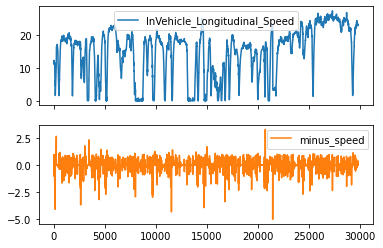

In [ ]:
sensor1_data[['InVehicle_Longitudinal_Speed','minus_speed']].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f569d27c820>,
      dtype=object)

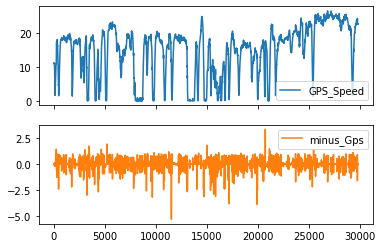

In [ ]:
sensor1_data[['GPS_Speed','minus_Gps']].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f569cc0bd00>,
      dtype=object)

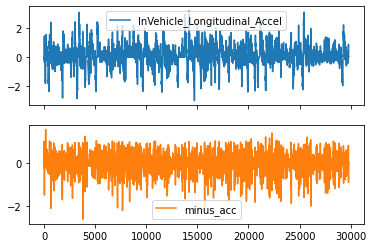

In [ ]:
sensor1_data[['InVehicle_Longitudinal_Accel','minus_acc']].plot(subplots=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
stationary_speed = adfuller(sensor1_data['InVehicle_Longitudinal_Speed'])
stationary_gps = adfuller(sensor1_data['GPS_Speed'])
stationary_acc = adfuller(sensor1_data['InVehicle_Longitudinal_Accel'])
print("stationary_speed : {}\n stationary_gps :{}\nstationary_acc :{}\n".format(stationary_speed[1],stationary_gps[1], stationary_acc[1]))

stationary_speed : 5.246853788321974e-13
 stationary_gps :1.1696527951235956e-13
stationary_acc :3.198582146523032e-29



In [ ]:
stationary_speed = adfuller(sensor1_data['minus_speed'].dropna())
stationary_gps = adfuller(sensor1_data['minus_Gps'].dropna())
stationary_acc = adfuller(sensor1_data['minus_acc'].dropna())
print("stationary_speed : {}\nstationary_gps :{}\nstationary_acc :{}\n".format(stationary_speed[1],stationary_gps[1], stationary_acc[1]))

stationary_speed : 2.4098539038035627e-30
stationary_gps :1.8480210233291323e-28
stationary_acc :0.0



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f569d2dc280>,
      dtype=object)

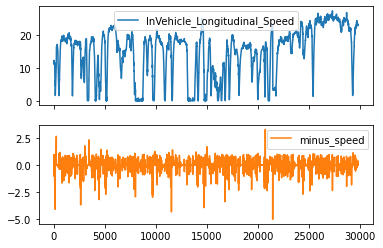

In [ ]:
sensor2_data[['InVehicle_Longitudinal_Speed','minus_speed']].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5699915760>,
      dtype=object)

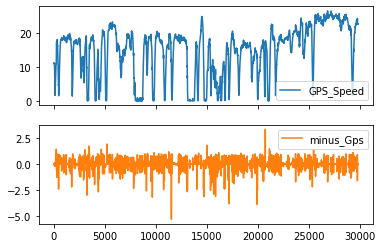

In [ ]:
sensor2_data[['GPS_Speed','minus_Gps']].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5699898c10>,
      dtype=object)

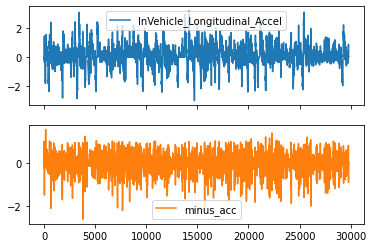

In [ ]:
sensor2_data[['InVehicle_Longitudinal_Accel','minus_acc']].plot(subplots=True)

In [ ]:
stationary_speed = adfuller(sensor2_data['InVehicle_Longitudinal_Speed'])
stationary_gps = adfuller(sensor2_data['GPS_Speed'])
stationary_acc = adfuller(sensor2_data['InVehicle_Longitudinal_Accel'])
print("stationary_speed : {}\n stationary_gps :{}\nstationary_acc :{}\n".format(stationary_speed[1],stationary_gps[1], stationary_acc[1]))

stationary_speed : 5.246853788321974e-13
 stationary_gps :1.1696527951235956e-13
stationary_acc :3.198582146523032e-29



In [ ]:
stationary_speed = adfuller(sensor2_data['minus_speed'].dropna())
stationary_gps = adfuller(sensor2_data['minus_Gps'].dropna())
stationary_acc = adfuller(sensor2_data['minus_acc'].dropna())
print("stationary_speed : {}\nstationary_gps :{}\nstationary_acc :{}\n".format(stationary_speed[1],stationary_gps[1], stationary_acc[1]))

stationary_speed : 2.4098539038035627e-30
stationary_gps :1.8480210233291323e-28
stationary_acc :0.0



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f56997f2100>,
      dtype=object)

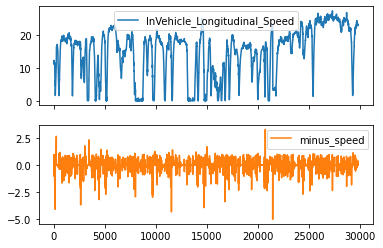

In [ ]:
sensor3_data[['InVehicle_Longitudinal_Speed','minus_speed']].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5699722940>,
      dtype=object)

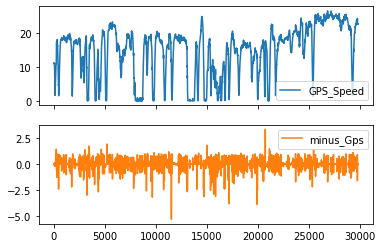

In [ ]:
sensor3_data[['GPS_Speed','minus_Gps']].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5699656850>,
      dtype=object)

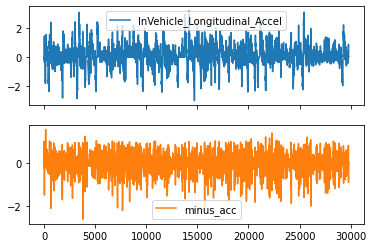

In [ ]:
sensor3_data[['InVehicle_Longitudinal_Accel','minus_acc']].plot(subplots=True)

In [ ]:
stationary_speed = adfuller(sensor3_data['InVehicle_Longitudinal_Speed'])
stationary_gps = adfuller(sensor3_data['GPS_Speed'])
stationary_acc = adfuller(sensor3_data['InVehicle_Longitudinal_Accel'])
print("stationary_speed : {}\n stationary_gps :{}\nstationary_acc :{}\n".format(stationary_speed[1],stationary_gps[1], stationary_acc[1]))

stationary_speed : 5.246853788321974e-13
 stationary_gps :1.1696527951235956e-13
stationary_acc :3.198582146523032e-29



In [ ]:
stationary_speed = adfuller(sensor3_data['minus_speed'].dropna())
stationary_gps = adfuller(sensor3_data['minus_Gps'].dropna())
stationary_acc = adfuller(sensor3_data['minus_acc'].dropna())
print("stationary_speed : {}\nstationary_gps :{}\nstationary_acc :{}\n".format(stationary_speed[1],stationary_gps[1], stationary_acc[1]))

stationary_speed : 2.4098539038035627e-30
stationary_gps :1.8480210233291323e-28
stationary_acc :0.0



In [ ]:
scaler  = StandardScaler()
scaler.fit(sensor1_data[['minus_speed','minus_Gps','minus_acc']])
sensor1_data_normal = scaler.transform(sensor1_data[['minus_speed','minus_Gps','minus_acc']]) 
sensor1_data_normal[:5]

array([[-0.05070828, -0.32305109, -1.58644656],
       [-0.02786589, -0.04536014,  1.66249181],
       [-0.02371787,  0.08640399,  0.30020362],
       [-0.01352507,  0.04198683,  0.03721539],
       [-0.00924143, -0.09532848, -0.01366623]])

In [ ]:
scaler  = StandardScaler()
scaler.fit(sensor2_data[['minus_speed','minus_Gps','minus_acc']])
sensor2_data_normal = scaler.transform(sensor2_data[['minus_speed','minus_Gps','minus_acc']]) 
sensor2_data_normal[:5]

array([[-0.05070828, -0.32305109, -1.58644656],
       [-0.02786589, -0.04536014,  1.66249181],
       [-0.02371787,  0.08640399,  0.30020362],
       [-0.01352507,  0.04198683,  0.03721539],
       [-0.00924143, -0.09532848, -0.01366623]])

In [ ]:
scaler  = StandardScaler()
scaler.fit(sensor3_data[['minus_speed','minus_Gps','minus_acc']])
sensor3_data_normal = scaler.transform(sensor3_data[['minus_speed','minus_Gps','minus_acc']]) 
sensor3_data_normal[:5]

array([[-0.05070828, -0.32305109, -1.58644656],
       [-0.02786589, -0.04536014,  1.66249181],
       [-0.02371787,  0.08640399,  0.30020362],
       [-0.01352507,  0.04198683,  0.03721539],
       [-0.00924143, -0.09532848, -0.01366623]])

In [ ]:
window_size = 10

# create windows with overlap
def convertToFrames(X_data,y_data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    
    for i in range(len(X_data)-step):
        y_or = 0
        d=i+step  
        X.append(X_data[i:d,])
        for y in y_data.iloc[i:d].values:
           y_or = y_or or y
        
        Y.append(y_or)
    return np.array(X), np.array(Y)

In [ ]:
X_sensor1, y_sensor1 = convertToFrames(sensor1_data_normal, sensor1_label, window_size)
X_sensor1.shape, y_sensor1.shape

((29789, 10, 3), (29789, 1))

In [ ]:
X_sensor2, y_sensor2 = convertToFrames(sensor2_data_normal, sensor2_label, window_size)
X_sensor2.shape, y_sensor2.shape

((29789, 10, 3), (29789, 1))

In [ ]:
X_sensor3, y_sensor3 = convertToFrames(sensor3_data_normal, sensor3_label, window_size)
X_sensor3.shape, y_sensor3.shape

((29789, 10, 3), (29789, 1))

In [ ]:
y_sensor1 = to_categorical(y_sensor1, num_classes= 2, dtype='float32')
X_train_sensor1,X_test_sensor1, y_train_sensor1, y_test_sensor1 = train_test_split(X_sensor1,y_sensor1,random_state = 1400, test_size= 0.2)
X_train_sensor1 = np.reshape(X_train_sensor1, (X_train_sensor1.shape[0],  X_train_sensor1.shape[1],X_train_sensor1.shape[2], 1))
X_test_sensor1 = np.reshape(X_test_sensor1, (X_test_sensor1.shape[0],X_test_sensor1.shape[1],X_test_sensor1.shape[2], 1))
y_train_sensor1, y_test_sensor1 = y_train_sensor1.squeeze(), y_test_sensor1.squeeze()
X_train_sensor1.shape, X_test_sensor1.shape,y_train_sensor1.shape, y_test_sensor1.shape

((23831, 10, 3, 1), (5958, 10, 3, 1), (23831, 2), (5958, 2))

In [ ]:
y_sensor2 = to_categorical(y_sensor2, num_classes= 2, dtype='float32')
X_train_sensor2,X_test_sensor2, y_train_sensor2, y_test_sensor2 = train_test_split(X_sensor2,y_sensor2,random_state = 1400, test_size= 0.2)
X_train_sensor2 = np.reshape(X_train_sensor2, (X_train_sensor2.shape[0],  X_train_sensor2.shape[1],X_train_sensor2.shape[2], 1))
X_test_sensor2 = np.reshape(X_test_sensor2, (X_test_sensor2.shape[0],X_test_sensor2.shape[1],X_test_sensor2.shape[2], 1))
y_train_sensor2, y_test_sensor2 = y_train_sensor2.squeeze(), y_test_sensor2.squeeze()
X_train_sensor2.shape, X_test_sensor2.shape,y_train_sensor2.shape, y_test_sensor2.shape

((23831, 10, 3, 1), (5958, 10, 3, 1), (23831, 2), (5958, 2))

In [ ]:
y_sensor3 = to_categorical(y_sensor3, num_classes= 2, dtype='float32')
X_train_sensor3,X_test_sensor3, y_train_sensor3, y_test_sensor3 = train_test_split(X_sensor3,y_sensor3,random_state = 1400, test_size= 0.2)
X_train_sensor3 = np.reshape(X_train_sensor3, (X_train_sensor3.shape[0],  X_train_sensor3.shape[1],X_train_sensor3.shape[2], 1))
X_test_sensor3 = np.reshape(X_test_sensor3, (X_test_sensor3.shape[0],X_test_sensor3.shape[1],X_test_sensor3.shape[2], 1))
y_train_sensor3, y_test_sensor3 = y_train_sensor3.squeeze(), y_test_sensor3.squeeze()
X_train_sensor3.shape, X_test_sensor3.shape,y_train_sensor3.shape, y_test_sensor3.shape

((23831, 10, 3, 1), (5958, 10, 3, 1), (23831, 2), (5958, 2))

In [ ]:
# _tags = np.unique(sensor1_label['Class'])
# class_weights = class_weight.compute_class_weight('balanced', _tags, sensor1_label.Class)
# print(_tags)
# print(class_weights)

In [ ]:
def creatModel():
  model = Sequential()
  ## CNN 
  model.add(TimeDistributed( Conv1D(kernel_size=3, filters= 40, activation= 'relu', padding='same',
                   input_shape=(X_train_sensor1.shape[0], X_train_sensor1.shape[1],))))
  model.add(TimeDistributed(Dropout(0.2)))
  model.add(TimeDistributed( Conv1D(kernel_size=3, filters= 60, activation= 'relu', padding='same')))
  model.add(TimeDistributed(Dropout(0.2)))
  model.add(TimeDistributed(Conv1D(kernel_size=3, filters= 60, activation= 'relu', padding='same')))
  # model.add(MaxPooling1D((2,)))
  model.add(TimeDistributed(GlobalMaxPool1D()))
  model.add(TimeDistributed(Dropout(0.2)))
  ##BiLSTM
  model.add(Bidirectional(LSTM(60)))
  model.add(Dense(units= 30))
  model.add(Dropout(0.2))

  model.add(Dense(2, activation='sigmoid'))#, kernel_regularizer=l2()

  model.compile(optimizer = Adam(), loss= 'binary_crossentropy',  metrics=['accuracy'])
  return model

In [ ]:
model_path = '/content/drive/MyDrive/CAV/data/Constant attack/0_1_dur_10/Models/Models15/'

class Model_save(Callback):
  def on_epoch_end(self, epoch, logs={}):
    self.model.save(model_path + "MultiCNN-BiLSTM-CAV-StandarNormal-Constant-0_1_dur_10-PerEpochs_{}.h5".format(sensor))

In [ ]:
def settCallbacks(sensor):

  best_model_path = model_path + 'Best_MultiCNN-BiLSTM-CAV-standardNormal-Constant-0_1_dur_10_{}.h5'.format(sensor)
  checkpoint = ModelCheckpoint(best_model_path, monitor='val_loss', save_best_only=True, mode='min')

  history_cb = tf.keras.callbacks.CSVLogger(model_path + 'historyLOG_{}.csv'.format(sensor), separator=",", append=True)

  model_save = Model_save()

  Estop = EarlyStopping(monitor='val_accuracy', patience= 200)
  
  return model_save, checkpoint, history_cb, Estop

In [ ]:
import time

class TimeHistory(Callback):
  
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        epoch_time = time.time() - self.epoch_time_start
        logs['epoch_time'] = epoch_time

In [ ]:
sensor = "sensor1"
time_callback = TimeHistory()
model_sensor1 = creatModel()
model_save, checkpoint, history_cb, Estop = settCallbacks("sensor1")
history_sensor1 = model_sensor1.fit(X_train_sensor1, y_train_sensor1,
                                    batch_size = 64, epochs = 300,
                                    validation_split = 0.2,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)

Epoch 1/300
298/298 [==============================] - 16s 13ms/step - loss: 0.3353 - accuracy: 0.8719 - val_loss: 0.1939 - val_accuracy: 0.9318 - epoch_time: 15.5751
Epoch 2/300
298/298 [==============================] - 3s 9ms/step - loss: 0.1340 - accuracy: 0.9589 - val_loss: 0.0834 - val_accuracy: 0.9742 - epoch_time: 2.6459
Epoch 3/300
298/298 [==============================] - 3s 10ms/step - loss: 0.0731 - accuracy: 0.9784 - val_loss: 0.0607 - val_accuracy: 0.9797 - epoch_time: 2.7436
Epoch 4/300
298/298 [==============================] - 4s 13ms/step - loss: 0.0533 - accuracy: 0.9843 - val_loss: 0.0442 - val_accuracy: 0.9864 - epoch_time: 3.7896
Epoch 5/300
298/298 [==============================] - 3s 11ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0295 - val_accuracy: 0.9910 - epoch_time: 3.1761
Epoch 6/300
298/298 [==============================] - 3s 10ms/step - loss: 0.0380 - accuracy: 0.9895 - val_loss: 0.0359 - val_accuracy: 0.9891 - epoch_time: 2.7829
Epoch 7/3

In [ ]:
model_sensor1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 10, 3, 40)        160       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 10, 3, 40)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 10, 3, 60)        7260      
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 10, 3, 60)        0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 10, 3, 60)        1

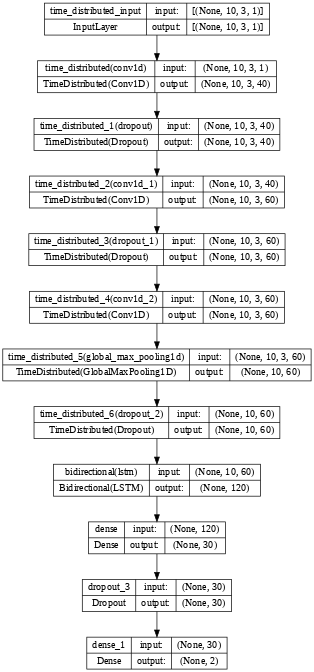

In [ ]:
plot_model(model= model_sensor1, show_shapes= True, dpi=50)

In [ ]:
sensor = "sensor2"
time_callback = TimeHistory()
model_sensor2 = creatModel()
model_save, checkpoint, history_cb, Estop = settCallbacks("sensor2")
history_sensor2 = model_sensor2.fit(X_train_sensor2, y_train_sensor2,
                                    batch_size = 64, epochs = 300,
                                    validation_split = 0.2,
                                    verbose = 1,
                                    callbacks = [time_callback,model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)

Epoch 1/300
298/298 [==============================] - 7s 12ms/step - loss: 0.2829 - accuracy: 0.8873 - val_loss: 0.0892 - val_accuracy: 0.9759 - epoch_time: 7.1202
Epoch 2/300
298/298 [==============================] - 3s 9ms/step - loss: 0.0862 - accuracy: 0.9763 - val_loss: 0.0618 - val_accuracy: 0.9838 - epoch_time: 2.6362
Epoch 3/300
298/298 [==============================] - 3s 9ms/step - loss: 0.0634 - accuracy: 0.9829 - val_loss: 0.0627 - val_accuracy: 0.9853 - epoch_time: 2.6569
Epoch 4/300
298/298 [==============================] - 3s 9ms/step - loss: 0.0513 - accuracy: 0.9861 - val_loss: 0.0498 - val_accuracy: 0.9868 - epoch_time: 2.6420
Epoch 5/300
298/298 [==============================] - 3s 9ms/step - loss: 0.0461 - accuracy: 0.9867 - val_loss: 0.0366 - val_accuracy: 0.9893 - epoch_time: 2.6547
Epoch 6/300
298/298 [==============================] - 3s 9ms/step - loss: 0.0362 - accuracy: 0.9901 - val_loss: 0.0298 - val_accuracy: 0.9922 - epoch_time: 2.6353
Epoch 7/300
298

In [ ]:
sensor = "sensor3"
time_callback = TimeHistory()
model_sensor3 = creatModel()
model_save, checkpoint, history_cb, Estop = settCallbacks("sensor3")
history_sensor3 = model_sensor3.fit(X_train_sensor3, y_train_sensor3,
                                    batch_size = 64, epochs = 300,
                                    validation_split = 0.2,
                                    verbose = 1,
                                    callbacks = [time_callback,model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)

Epoch 1/300
298/298 [==============================] - 7s 12ms/step - loss: 0.3336 - accuracy: 0.8569 - val_loss: 0.1370 - val_accuracy: 0.9578 - epoch_time: 6.8260
Epoch 2/300
298/298 [==============================] - 3s 10ms/step - loss: 0.1043 - accuracy: 0.9653 - val_loss: 0.0908 - val_accuracy: 0.9679 - epoch_time: 2.7613
Epoch 3/300
298/298 [==============================] - 3s 9ms/step - loss: 0.0805 - accuracy: 0.9729 - val_loss: 0.0823 - val_accuracy: 0.9694 - epoch_time: 2.6374
Epoch 4/300
298/298 [==============================] - 3s 9ms/step - loss: 0.0708 - accuracy: 0.9767 - val_loss: 0.0752 - val_accuracy: 0.9738 - epoch_time: 2.6396
Epoch 5/300
298/298 [==============================] - 3s 9ms/step - loss: 0.0673 - accuracy: 0.9782 - val_loss: 0.0765 - val_accuracy: 0.9750 - epoch_time: 2.6860
Epoch 6/300
298/298 [==============================] - 3s 10ms/step - loss: 0.0649 - accuracy: 0.9787 - val_loss: 0.0645 - val_accuracy: 0.9784 - epoch_time: 2.7710
Epoch 7/300
2

In [ ]:
#plot history of model_sensor1
history_sensor1 = pd.read_csv(model_path+"historyLOG_sensor1.csv", index_col='epoch')
history_sensor1.reset_index(drop= True, inplace= True)
history_sensor1.head()
print('Average Exe_time for sensor1: {} sec.'.format(round(np.mean(history_sensor1['epoch_time'].values),3)))

Average Exe_time for sensor1: 2.878 sec.


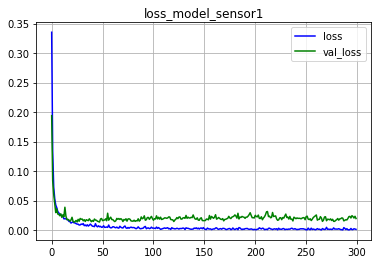

In [ ]:
plt.plot( history_sensor1['loss'], 'b',label = 'loss')
plt.plot( history_sensor1['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor1')
plt.show()

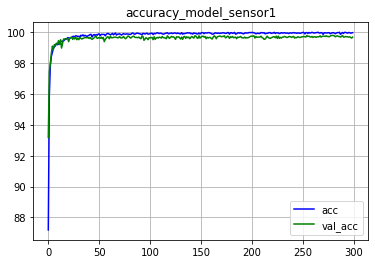

In [ ]:
plt.plot(history_sensor1['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor1['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor1')
plt.show()

In [ ]:
#plot history of model_sensor2
history_sensor2 = pd.read_csv(model_path+"historyLOG_sensor2.csv", index_col='epoch')
history_sensor2.head()
print('Average Exe_time for sensor2: {} sec.'.format(round(np.mean(history_sensor2['epoch_time'].values),3)))

Average Exe_time for sensor2: 2.871 sec.


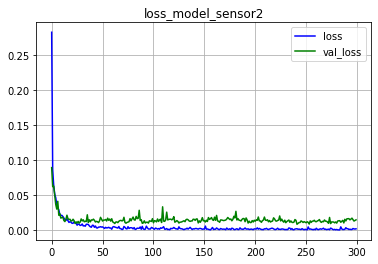

In [ ]:
plt.plot( history_sensor2['loss'], 'b',label = 'loss')
plt.plot( history_sensor2['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor2')
plt.show()

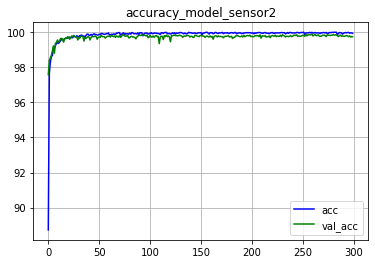

In [ ]:
plt.plot(history_sensor2['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor2['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor2')
plt.show()

In [ ]:
#plot history of model_sensor3
history_sensor3 = pd.read_csv(model_path+"historyLOG_sensor3.csv", index_col='epoch')
history_sensor3.head()
print('Average Exe_time for sensor3: {} sec.'.format(round(np.mean(history_sensor3['epoch_time'].values),3)))

Average Exe_time for sensor3: 2.792 sec.


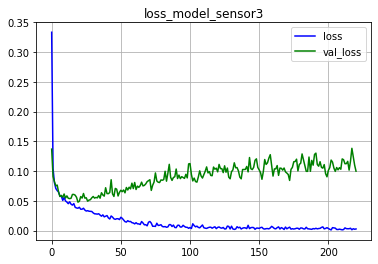

In [ ]:
plt.plot( history_sensor3['loss'], 'b',label = 'loss')
plt.plot( history_sensor3['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor3')
plt.show()

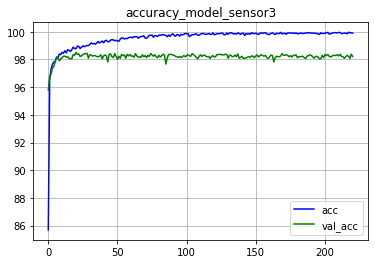

In [ ]:
plt.plot(history_sensor3['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor3['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor3')
plt.show()

In [ ]:
#last model_sensor1 evaluation
test_loss, test_acc = model_sensor1.evaluate( X_test_sensor1, y_test_sensor1, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

187/187 [==============================] - 1s 4ms/step - loss: 0.0202 - accuracy: 0.9975
test accuracy :99.7% 
 test loss :0.0202


In [ ]:
#last model_sensor2 evaluation
test_loss, test_acc = model_sensor2.evaluate( X_test_sensor2, y_test_sensor2, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

187/187 [==============================] - 1s 4ms/step - loss: 0.0147 - accuracy: 0.9977
test accuracy :99.8% 
 test loss :0.0147


In [ ]:
#last model_sensor3 evaluation
test_loss, test_acc = model_sensor3.evaluate( X_test_sensor3, y_test_sensor3, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

187/187 [==============================] - 1s 4ms/step - loss: 0.0821 - accuracy: 0.9869
test accuracy :98.7% 
 test loss :0.0821


In [ ]:
y_pred_sensor1 = model_sensor1.predict( X_test_sensor1, verbose= 1)
y_pred_sensor2 = model_sensor2.predict( X_test_sensor2, verbose= 1)
y_pred_sensor3 = model_sensor3.predict( X_test_sensor3, verbose= 1)

187/187 [==============================] - 1s 3ms/step


In [ ]:
y_pred_sensor1[0]

array([7.286851e-05, 9.999211e-01], dtype=float32)

In [ ]:
y_pred_sensor1 = [np.argmax(i) for i in y_pred_sensor1]
y_pred_sensor2 = [np.argmax(i) for i in y_pred_sensor2]
y_pred_sensor3 = [np.argmax(i) for i in y_pred_sensor3]

In [ ]:
y_pred_total = []
for i in range(len(y_pred_sensor1)):
  y_pred_total.append( y_pred_sensor1[i] or y_pred_sensor2[i] or y_pred_sensor3[i])

In [ ]:
assert(len(y_pred_total) == len(y_pred_sensor1))

In [ ]:
y_test_sensor1 = [np.argmax(i) for i in y_test_sensor1]
y_test_sensor2 = [np.argmax(i) for i in y_test_sensor2]
y_test_sensor3 = [np.argmax(i) for i in y_test_sensor3]

In [ ]:
y_test_total = []
for i in range(len(y_test_sensor1)):
  y_test_total.append(y_test_sensor1[i] or y_test_sensor2[i] or y_test_sensor3[i])

In [ ]:
print("Sensor 1 performanace:")
recall = recall_score(y_test_sensor1, y_pred_sensor1, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor1, y_pred_sensor1, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor1, y_pred_sensor1, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor1, y_pred_sensor1)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 1 performanace:
recall score : 99.63%

precision score: 99.75%

F1 score: 99.69%

accuracy score: 99.75%



In [ ]:
print("Sensor 2 performanace:")
recall = recall_score(y_test_sensor2, y_pred_sensor2, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor2, y_pred_sensor2, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor2, y_pred_sensor2, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor2, y_pred_sensor2)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 2 performanace:
recall score : 99.63%

precision score: 99.78%

F1 score: 99.71%

accuracy score: 99.77%



In [ ]:
print("Sensor 3 performanace:")
recall = recall_score(y_test_sensor3, y_pred_sensor3, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor3, y_pred_sensor3, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor3, y_pred_sensor3, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor3, y_pred_sensor3)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 3 performanace:
recall score : 98.33%

precision score: 98.37%

F1 score: 98.35%

accuracy score: 98.69%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_total, y_pred_total, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_total, y_pred_total, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_total, y_pred_total, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_total, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 99.09%

precision score: 99.09%

F1 score: 99.09%

accuracy score: 99.09%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_total, y_pred_total, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_total, y_pred_total, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_total, y_pred_total, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_total, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 99.07%

precision score: 98.98%

F1 score: 99.02%

accuracy score: 99.09%



In [ ]:
conf = confusion_matrix(y_test_total, y_pred_total, labels=[1,0])
conf_df = pd.DataFrame(conf, columns= [1,0], index= [1,0])
conf_df

,1,0
1,3755,32
0,22,2149
